In [4]:
import cenpy
import pandas
# import numpy
# import matplotlib.pyplot
# import seaborn
import geopandas
import contextily
# import os
# import requests
# import zipfile
# import io
import re
import matplotlib.pyplot as plt



d:\Users\brian\Documents\GitHub\CAN\.venv\Lib\site-packages\cenpy\geoparser.py:226: UserWarning: Shape is invalid: 
Ring Self-intersection[-12498078.3456 3947955.7415]
  tell_user("Shape is invalid: \n{}".format(vexplain))
d:\Users\brian\Documents\GitHub\CAN\.venv\Lib\site-packages\cenpy\geoparser.py:245: ShapelyDeprecationWarning: The 'cascaded_union()' function is deprecated. Use 'unary_union()' instead.
  polygons[i] = exterior.difference(cascaded_union(owned_interiors))


Matched: Phoenix, AZ to Phoenix city within layer Incorporated Places


C:\Users\brian\AppData\Local\Temp\ipykernel_18812\3615864777.py:6: FutureWarning: The `op` parameter is deprecated and will be removed in a future release. Please use the `predicate` parameter instead.
  phoenix_2019 = cenpy.products.ACS(2019).from_place('Phoenix, AZ', variables=hispanic)


<Axes: >

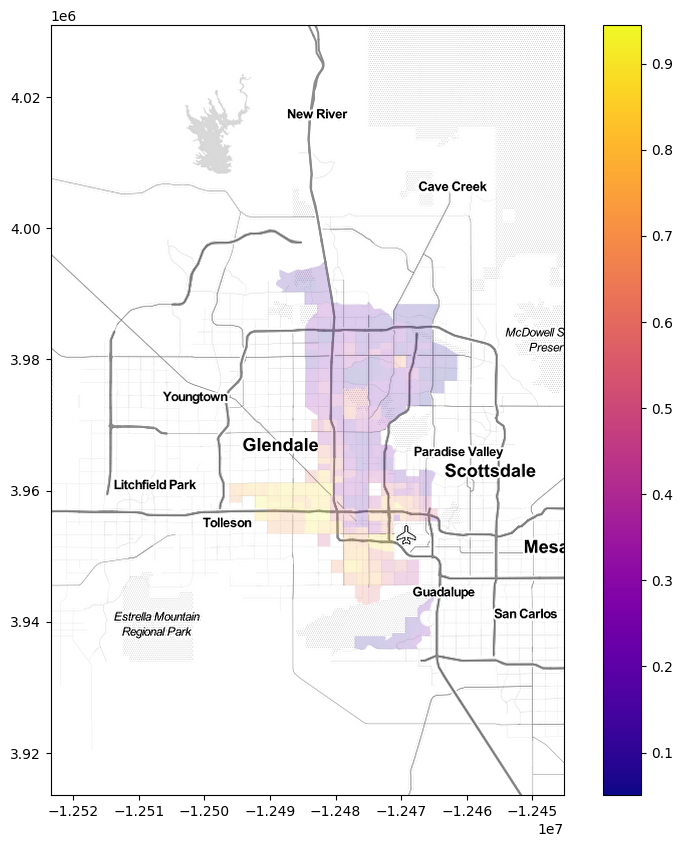

In [5]:
hispanic = ['B03002_001', # full population 
            'B03002_002', # nonhispanic
            'B03002_012' # hispanic 
           ]

phoenix_2019 = cenpy.products.ACS(2019).from_place('Phoenix, AZ', variables=hispanic)

phoenix_basemap, phoenix_extent = contextily.bounds2img(*phoenix_2019.total_bounds, zoom=10, source=contextily.providers.Stamen.TonerLite)

f,ax = plt.subplots(1,1, figsize=(10,10))
ax.imshow(phoenix_basemap, extent=phoenix_extent, interpolation='sinc')
phoenix_2019['pct_hispanic'] = phoenix_2019.eval('B03002_012E / B03002_001E')
phoenix_2019.plot('pct_hispanic', cmap='plasma', ax = ax, alpha=.2, legend=True)

In [6]:
phoenix_2017 = cenpy.products.ACS(2017).from_place('Phoenix, AZ', variables=hispanic)
phoenix_2017['pct_hispanic'] = phoenix_2017.eval('B03002_012E / B03002_001E')

d:\Users\brian\Documents\GitHub\CAN\.venv\Lib\site-packages\cenpy\geoparser.py:226: UserWarning: Shape is invalid: 
Ring Self-intersection[-12498078.3456 3947955.7415]
  tell_user("Shape is invalid: \n{}".format(vexplain))
d:\Users\brian\Documents\GitHub\CAN\.venv\Lib\site-packages\cenpy\geoparser.py:245: ShapelyDeprecationWarning: The 'cascaded_union()' function is deprecated. Use 'unary_union()' instead.
  polygons[i] = exterior.difference(cascaded_union(owned_interiors))


Matched: Phoenix, AZ to Phoenix city within layer Incorporated Places


C:\Users\brian\AppData\Local\Temp\ipykernel_18812\2061496426.py:1: FutureWarning: The `op` parameter is deprecated and will be removed in a future release. Please use the `predicate` parameter instead.
  phoenix_2017 = cenpy.products.ACS(2017).from_place('Phoenix, AZ', variables=hispanic)


Text(0.5, 1.0, 'Relative Change')

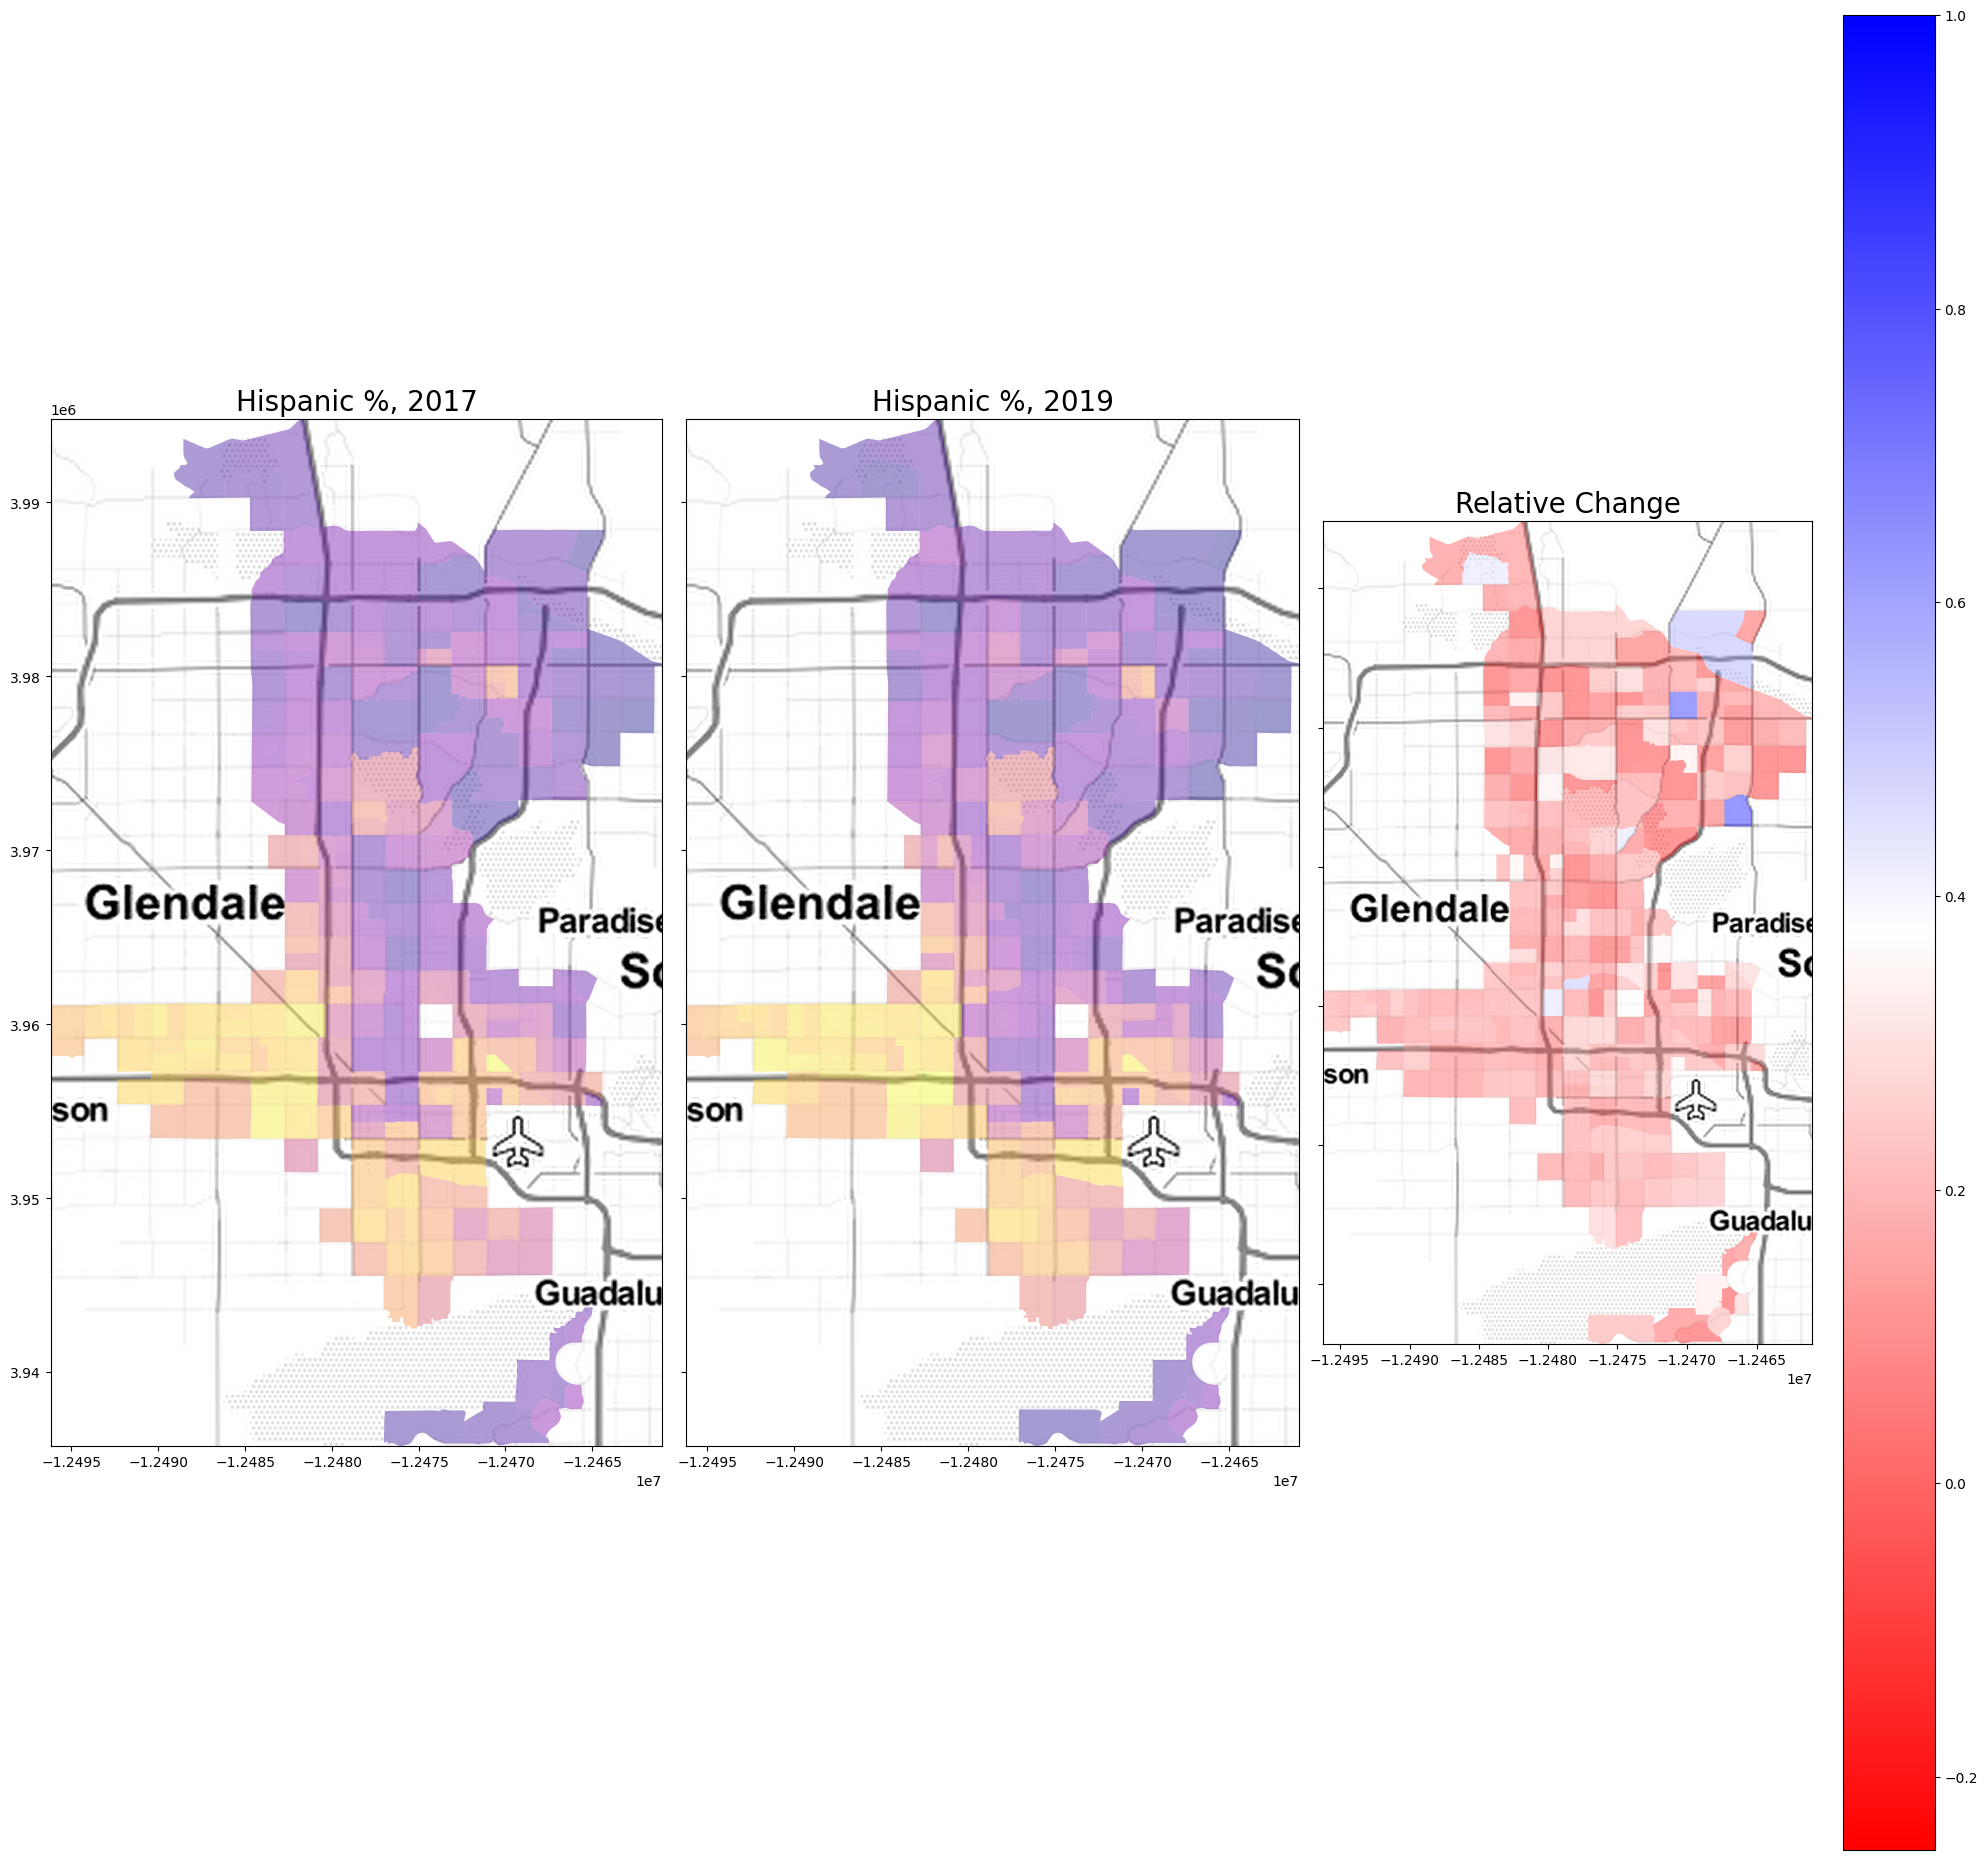

In [7]:
f,ax = plt.subplots(1,3, figsize=(20,20), sharex=True, sharey=True)
[ax_.imshow(phoenix_basemap, extent=phoenix_extent, interpolation='sinc') for ax_ in ax]
phoenix_2019.plot('pct_hispanic', cmap='plasma', ax = ax[1], alpha=.4)
phoenix_2017.plot('pct_hispanic', cmap='plasma', ax = ax[0], alpha=.4)
phoenix_2019.merge(phoenix_2017.drop('geometry',axis=1), on='GEOID', suffixes=('_2017', '_2019'))\
       .eval('pct_change = (pct_hispanic_2019- pct_hispanic_2017)/(pct_hispanic_2017)')\
       .plot('pct_change', cmap='bwr_r', ax=ax[2], alpha=.4, vmin=-.25, vmax=1.0, legend=True)
f.tight_layout()
ax[0].axis(phoenix_2019.total_bounds[[0,2,1,3]])
ax[0].set_title('Hispanic %, 2017', fontsize=20)
ax[1].set_title('Hispanic %, 2019', fontsize=20)
ax[2].set_title('Relative Change', fontsize=20)
